# COHORT ANALYSIS


## Data Description:

The dataset is Online Retail Dataset by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

It is gotten from UCI Machine learning Repository at "https://archive.ics.uci.edu/ml/datasets/online+retail"

## Data Processing

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset and looking at the columns and rows
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
#looking at the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320900 entries, 0 to 320899
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    320900 non-null  int64         
 1   StockCode    320900 non-null  object        
 2   Description  320900 non-null  object        
 3   Quantity     320900 non-null  int64         
 4   InvoiceDate  320900 non-null  datetime64[ns]
 5   UnitPrice    320900 non-null  float64       
 6   CustomerID   320900 non-null  int64         
 7   Country      320900 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 19.6+ MB


The dataset has already been cleaned in Excel where duplicates were removed, rows with empty CustomerIDs were removed, Rows where Quantity and Unitprice were lesser than zer(0) werw also removed.

In [4]:
#Let's create an invoice month, making all days to start form the first day of the month.
import datetime as dt

#defining the function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)

#apply the function to the dataframe 
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.tail()                                                 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
320895,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-01
320896,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-01
320897,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01
320898,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01
320899,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01


Here, we see that the Invoice Month  has been formed which was extracted from the InvoiceDate column.

In [5]:
#Lets create a column named Cohort Month with the minimum invoice date to know the first time customer was acquired
df['Cohort Month'] =  df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
320880,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,2011-12-01,2011-05-01
320881,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,2011-12-01,2010-12-01
320882,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,2011-12-01,2010-12-01
320883,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,2011-12-01,2010-12-01
320884,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom,2011-12-01,2010-12-01
320885,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,2011-12-01,2011-08-01
320886,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-01,2011-08-01
320887,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-01,2011-08-01
320888,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-01,2011-08-01
320889,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-01,2011-08-01


Here, the InvoiceDate and CohortMonth are different in several cases. There is an a Cohort Month with customers for a year.

In [6]:
# To create a date element function to get a series that will be used for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [7]:
# get date elements for our cohort and invoice columns, we used the underscore because we dont need the day
_,Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(df,'Cohort Month')


In [8]:
#To check if the series is working properly
Cohort_month[:10]

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: Cohort Month, dtype: int64

In [9]:
#create a cohort index 
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
320895,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-01,2011-08-01,5
320896,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-01,2011-08-01,5
320897,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01,5
320898,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01,5
320899,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01,2011-08-01,5


In [10]:
#Let's count the customer ID by grouping by Cohort Month  and Cohort Index to know when they started and how long they have been active
cohort_data = df.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,759
1,2010-12-01,2,224
2,2010-12-01,3,95
3,2010-12-01,4,300
4,2010-12-01,5,34
...,...,...,...
86,2011-10-01,2,101
87,2011-10-01,3,43
88,2011-11-01,1,381
89,2011-11-01,2,38


In [11]:
#Time to create a pivot table 
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,759.0,224.0,95.0,300.0,34.0,78.0,290.0,273.0,281.0,302.0,294.0,391.0,212.0
2011-01-01,315.0,32.0,101.0,6.0,23.0,111.0,91.0,89.0,111.0,117.0,130.0,45.0,NaN
2011-02-01,152.0,34.0,4.0,8.0,37.0,38.0,38.0,39.0,41.0,50.0,13.0,NaN,NaN
2011-03-01,539.0,7.0,36.0,127.0,136.0,114.0,149.0,138.0,169.0,51.0,NaN,NaN,NaN
2011-04-01,27.0,1.0,5.0,9.0,5.0,8.0,9.0,13.0,2.0,NaN,NaN,NaN,NaN
2011-05-01,71.0,16.0,15.0,10.0,15.0,18.0,21.0,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,405.0,86.0,97.0,114.0,108.0,139.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,301.0,69.0,66.0,77.0,92.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,232.0,50.0,60.0,64.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

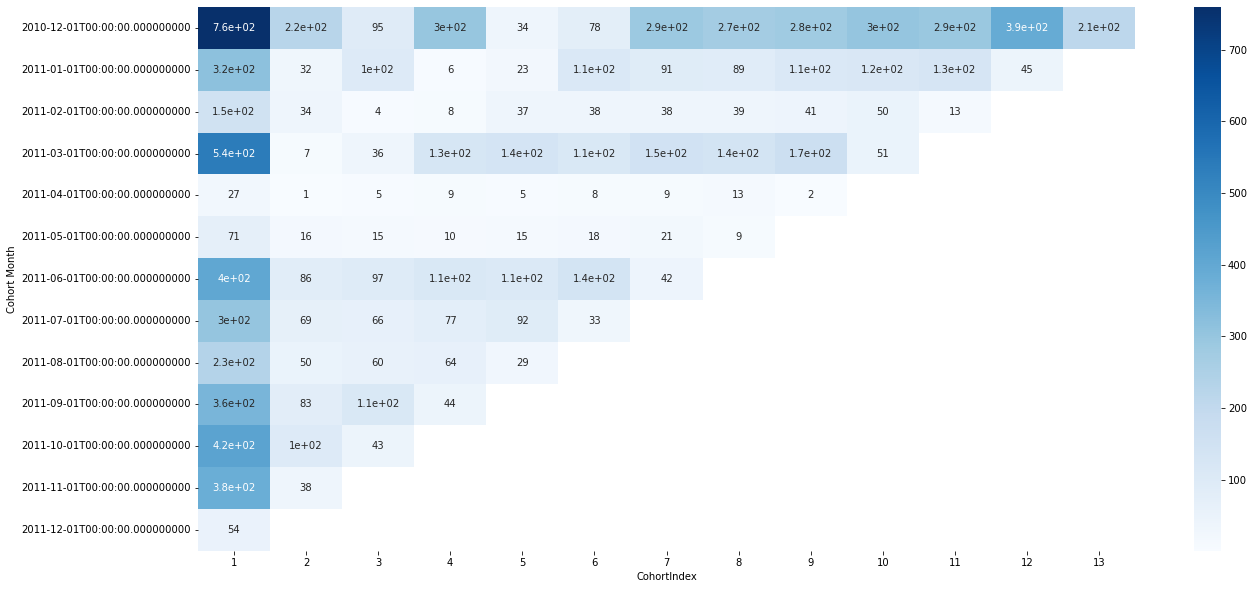

In [12]:
# change index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')


In [13]:
#cohort table for percentage whoch is done by dividing the information of other columns by that on the first column 
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,1.0,0.295125,0.125165,0.395257,0.044796,0.102767,0.382082,0.359684,0.370224,0.397892,0.387352,0.515152,0.279315
2011-01-01,1.0,0.101587,0.320635,0.019048,0.073016,0.352381,0.288889,0.282540,0.352381,0.371429,0.412698,0.142857,NaN
2011-02-01,1.0,0.223684,0.026316,0.052632,0.243421,0.250000,0.250000,0.256579,0.269737,0.328947,0.085526,NaN,NaN
2011-03-01,1.0,0.012987,0.066790,0.235622,0.252319,0.211503,0.276438,0.256030,0.313544,0.094620,NaN,NaN,NaN
2011-04-01,1.0,0.037037,0.185185,0.333333,0.185185,0.296296,0.333333,0.481481,0.074074,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.225352,0.211268,0.140845,0.211268,0.253521,0.295775,0.126761,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.212346,0.239506,0.281481,0.266667,0.343210,0.103704,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.229236,0.219269,0.255814,0.305648,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215517,0.258621,0.275862,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

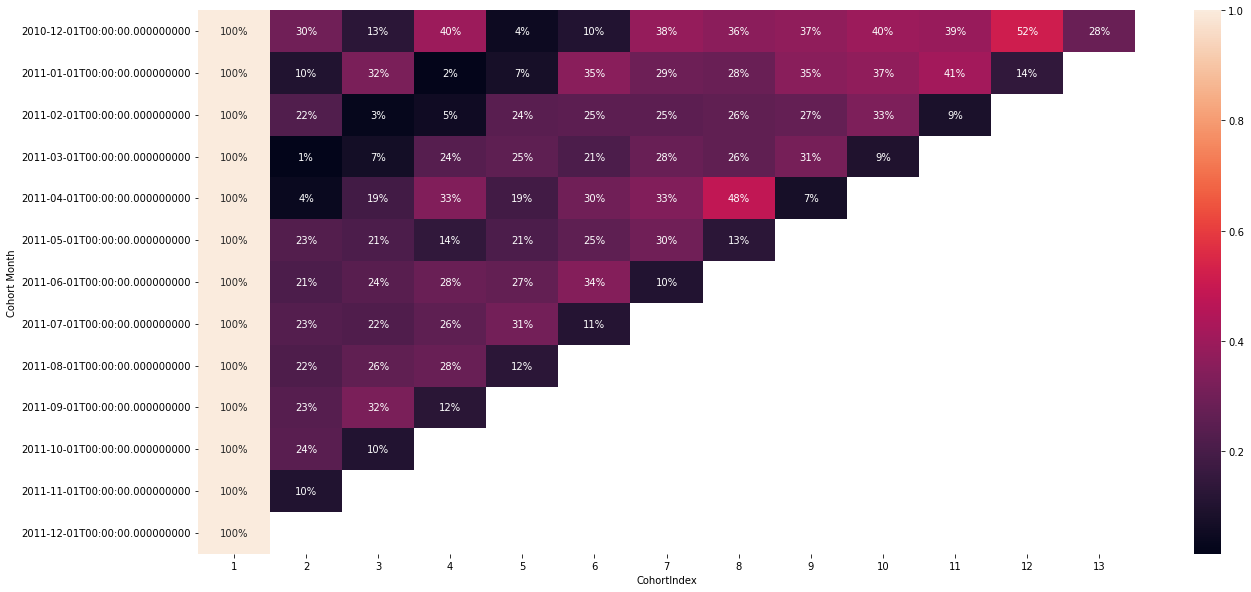

In [15]:
#creating visualization for percentages 
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')
